# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [0]:
import pandas as pd
import numpy as np
import folium


In [3]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/JonasZimmer1994/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: True
Cloning into 'DataScienceSS20'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 877 (delta 20), reused 0 (delta 0), pack-reused 845
Receiving objects: 100% (877/877), 125.10 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (449/449), done.
Checking out files: 100% (211/211), done.


In [0]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv(path+'/DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [5]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,is_pickup_JFK,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,trip_distance,is_pickup_lower_manhattan,is_dropoff_lower_manhattan,pickup_borough_bronx,pickup_borough_brooklyn,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0,0,0,0,0,0,0.640487,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,0,0,0,0,0,0,5.250670,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0,0,0,0,0,0,0.863411,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,0,0,0,0,0,0,1.739386,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,0,0,0,0,0,0,1.242218,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [6]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-2014 for training and 2015 for evaluation


In [7]:
Years = X.groupby(X['pickup_year'])
Years.get_group(2009)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,is_pickup_JFK,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,trip_distance,is_pickup_lower_manhattan,is_dropoff_lower_manhattan,pickup_borough_bronx,pickup_borough_brooklyn,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0,0,0,0,0,0,0.640487,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9,-73.980658,40.733873,-73.991540,40.758138,2,2,1,3,9,2009,0,0,0,0,0,0,1.770676,1,0,0,0,1,0,0,0,0,0,1,0,0,0
11,-73.991601,40.744712,-73.983081,40.744682,2,6,1,5,11,2009,0,0,0,0,0,0,0.446000,0,0,0,0,1,0,0,0,0,0,1,0,0,0
15,-73.981060,40.737690,-73.994177,40.728412,1,22,16,3,7,2009,0,0,0,0,0,0,0.939454,1,1,0,0,1,0,0,0,0,0,1,0,0,0
20,-73.991707,40.770505,-73.985459,40.763671,1,6,18,4,8,2009,0,0,0,0,0,0,0.574331,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399963,-73.992709,40.740467,-73.972586,40.754990,1,19,1,4,2,2009,0,0,0,0,0,0,1.454784,1,0,0,0,1,0,0,0,0,0,1,0,0,0
399986,-74.008813,40.713915,-73.979168,40.757925,1,12,9,2,5,2009,0,0,0,0,0,0,3.413977,1,0,0,0,1,0,0,0,0,0,1,0,0,0
399989,-73.983200,40.722297,-73.982277,40.735242,1,17,22,2,3,2009,0,0,0,0,0,0,0.895718,1,1,0,0,1,0,0,0,0,0,1,0,0,0
399994,-73.951399,40.770201,-73.973983,40.763075,1,2,11,4,7,2009,0,0,0,0,0,0,1.280272,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [0]:
#X_test = Years.get_group(2015)
#X_train = X.drop(Years.get_group(2015).index)
X_train=X[X['pickup_year']<2015]
y_train=y[X['pickup_year']<2015]
X_test=X[X['pickup_year']==2015]
y_test=y[X['pickup_year']==2015]

In [0]:
#y_grouped = y.groupby(X['pickup_year'])
#y_test = y_grouped.get_group(2015)
#y_train = y.drop(y_grouped.get_group(2015).index)

In [0]:
#print(X_train.shape())

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [0]:
X_train, y_train = make_regression(n_features=31, n_informative=2, random_state=0, shuffle=False)

In [0]:
regr = RandomForestRegressor(n_jobs=10, n_estimators=200, max_depth= 200, min_samples_split= 30)

In [86]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=10, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [87]:
from sklearn.metrics import mean_squared_error
predTrain = regr.predict(X_train)
predTest = regr.predict(X_test)

print("Mean Squared Error on train data: ", mean_squared_error(y_train, predTrain), "  Mean Squared Error on test data: ", mean_squared_error(y_test, predTest))

Mean Squared Error on train data:  1617.5391000488669   Mean Squared Error on test data:  10033.9011868507


In [0]:
dif = np.abs(y_test - predTest)

(array([4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 7.000e+00, 1.200e+01, 1.000e+01, 7.000e+00,
        8.000e+00, 8.000e+00, 1.300e+01, 1.000e+01, 3.960e+02, 1.410e+02,
        7.100e+01, 1.060e+02, 1.420e+02, 2.450e+02, 3.000e+02, 3.650e+02,
        3.340e+02, 4.820e+02, 8.100e+02, 1.404e+03, 2.025e+03, 3.954e+03,
        7.052e+03, 8.701e+03, 1.250e+03, 8.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

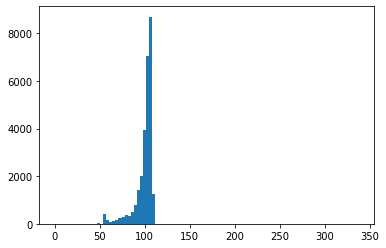

In [89]:
import matplotlib.pyplot as plt
plt.hist(dif, bins=100)

In [0]:
dif_zoom = dif[dif<120]
dif_zoom= dif_zoom[dif_zoom>50]

(array([4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 2.080e+02, 1.760e+02, 8.000e+00, 1.000e+00, 1.000e+01,
        6.000e+00, 4.000e+00, 8.000e+00, 7.000e+00, 1.090e+02, 1.000e+01,
        6.000e+00, 1.200e+01, 1.600e+01, 1.600e+01, 1.200e+01, 1.900e+01,
        2.100e+01, 2.300e+01, 1.600e+01, 2.600e+01, 2.400e+01, 1.800e+01,
        2.400e+01, 3.900e+01, 3.700e+01, 2.500e+01, 3.500e+01, 4.900e+01,
        4.900e+01, 4.000e+01, 4.700e+01, 6.500e+01, 6.100e+01, 4.500e+01,
        5.500e+01, 7.400e+01, 6.700e+01, 4.700e+01, 5.500e+01, 8.000e+01,
        6.500e+01, 6.800e+01, 6.000e+01, 9.200e+01, 4.500e+01, 6.000e+01,
        6.000e+01, 1.130e+02, 7.800e+01, 6.700e+01, 6.600e+01, 1.570e+02,
        9.200e+01, 1.020e+02, 1.040e+02, 2.400e+02, 1.330e+02, 1.410e+02,
        1.510e+02, 3.550e+02, 2.140e+02, 2.070e+02, 2.540e+02, 4.880e+02,
        2.910e+02, 3.280e+02, 3.580e+02, 7.820e+02, 4.160e+02, 4.410e+02,
        5.170e+02, 1.231e+03, 6.410e+0

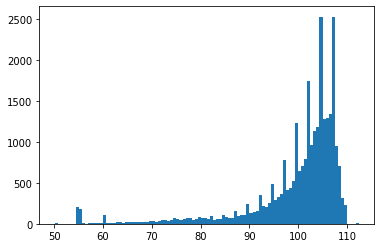

In [94]:
plt.hist(dif_zoom, bins=100)

In [95]:
np.median(dif)

102.98716836010153

In [0]:
regr2 = RandomForestRegressor(n_jobs=10, n_estimators=300, max_depth= 200, min_samples_split= 10)

In [161]:
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=10, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [162]:
from sklearn.metrics import mean_squared_error
pred2Train = regr2.predict(X_train)
pred2Test = regr2.predict(X_test)

print("Mean Squared Error on train data: ", mean_squared_error(y_train, pred2Train), "  Mean Squared Error on test data: ", mean_squared_error(y_test, pred2Test))

Mean Squared Error on train data:  296.49039276183134   Mean Squared Error on test data:  14739.897413695804


If there are to many samples in a split, the model gets worse,
if you increase the number of estimators, the time to train the model increases significantly. 
Higher numbers of estimators than 300 brings no plus in decreasing the error constantly, but lower numbers of estimators seem to give a variable error. Sometimes better sometimes worse. with more estimators the error is more constant